# Data Preparation and Cleaing
 ↪ Load the csv file with the pandas
 
 ↪ creating the dataframe and understanding the data present in the dataset
 
 ↪ Dealing with the missing data and the incorrect records

# Importing the Library

In [1]:
# Data manipulation library
import pandas as pd
import numpy as np

# Data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

# Hide warnings
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\AM\Downloads\Thane June Batch\Ecom\Ecom 2 - Nikita Warthi/Train.csv")

viewing the first 5 rows of the dataset

In [3]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
#Display structure and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


# Data Cleaning

In [5]:
#Checking if there is any null values in the dataset
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [6]:
df.duplicated().sum()

0

# There are no Missing values and duplicates values in data

In [7]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


# Handling Outliers

<Axes: >

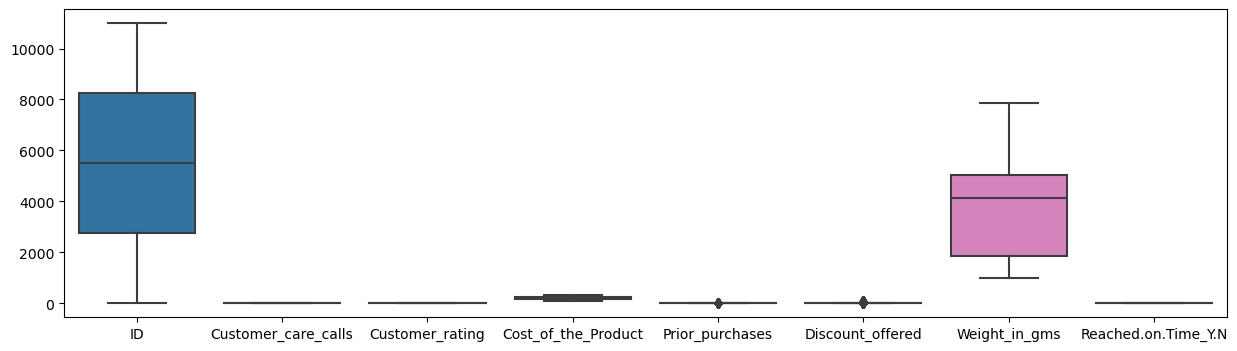

In [8]:
plt.figure(figsize=(15, 4))
sns.boxplot(df)

**Discount_offered : The outlier values are still appropriate (Discount_offered ranges between 0% to 100%). so, we'll not drop any of them, they are still valid observations.**

**Prior_purchases : The outlier values are still appropriate (6, 7, 8, or 10 prior purchases is still a valid number). so, we'll not drop any of them, they are still valid observations.**

<Axes: >

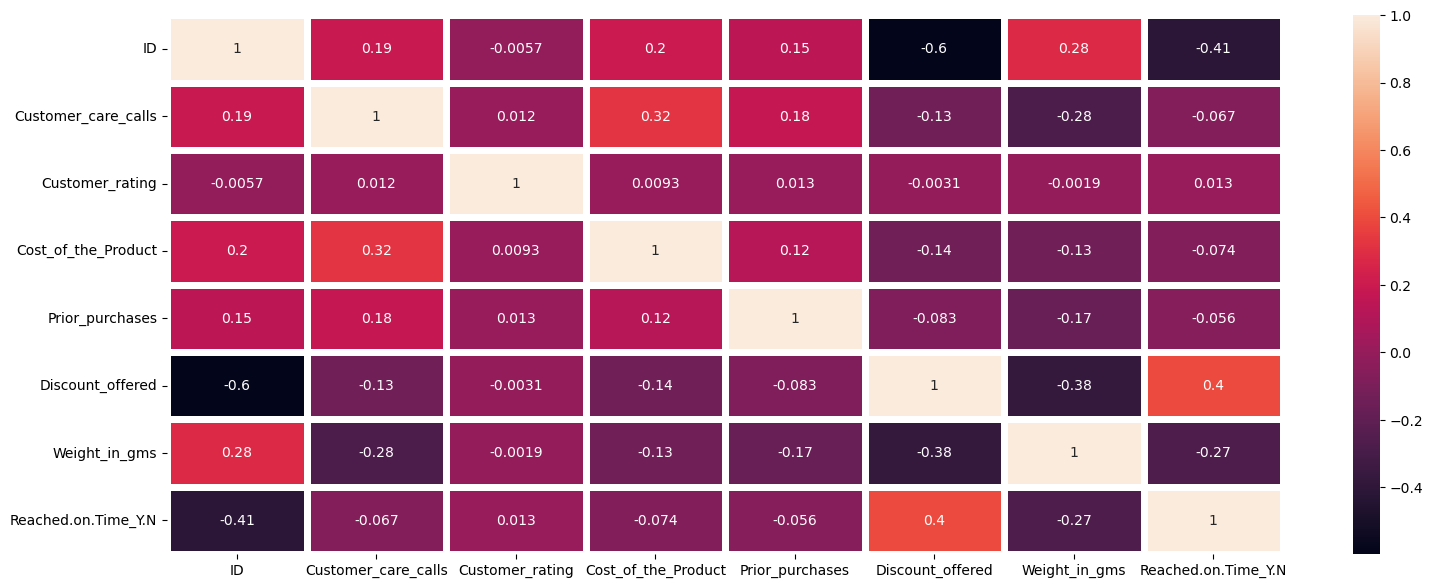

In [9]:
plt.figure(figsize=(18, 7))
sns.heatmap(df.corr(), annot=True, linewidth=5, linecolor='white')

Discount_Offered and weight_in_grams have negative correlation -0.38%.
Weights_in_gram have negative correlation with Reached.on.Time_Y.N -27%.
Customer_care_calls and Cost_of_the_Product have positive correlation 32%

In [10]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

# Univariate  Analysis

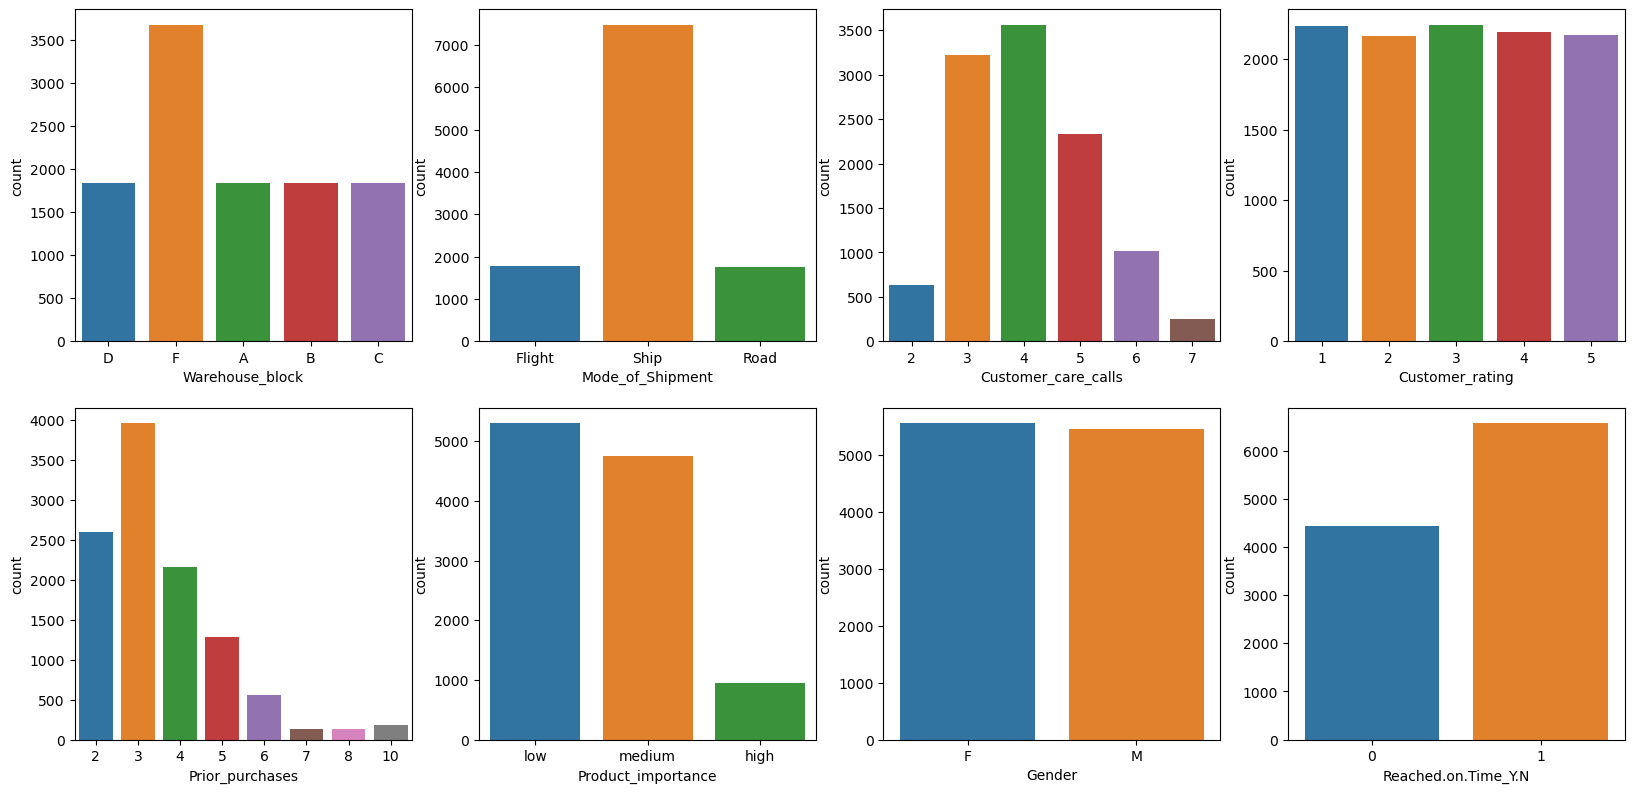

In [11]:
plt.figure(figsize=(20,25))
df.columns_ = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 
              'Prior_purchases', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']
i=1
for col in (df.columns_ ):
    plt.subplot(5,4,i)
    sns.countplot(x = df[col],data=df)
    i=i+1

# Bivariate Analysis

# Warehouse block

Text(0.5, 1.0, 'Whether Reaching delivery based on Warehouse_block?')

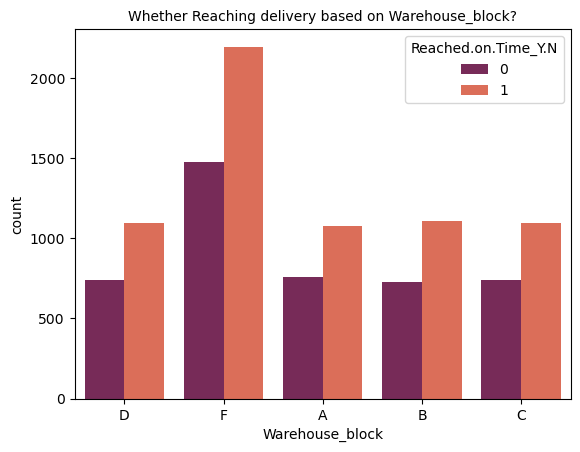

In [12]:
sns.countplot(x='Warehouse_block',hue='Reached.on.Time_Y.N',data=df,palette='rocket')
plt.title('Whether Reaching delivery based on Warehouse_block?', fontsize=10)

# Mode_of_Shipment

<Axes: xlabel='Mode_of_Shipment', ylabel='count'>

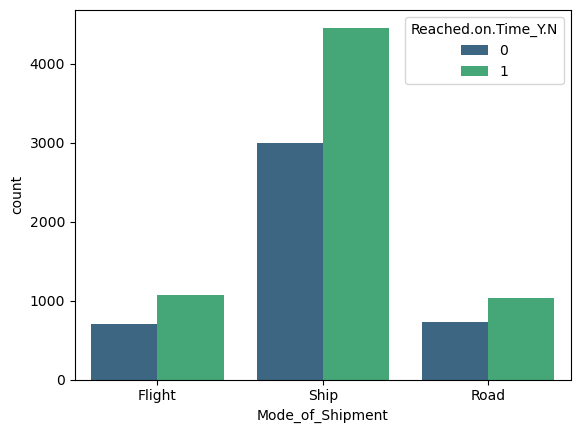

In [13]:
sns.countplot(x='Mode_of_Shipment',hue='Reached.on.Time_Y.N',data=df,palette='viridis')

<Axes: ylabel='Mode_of_Shipment'>

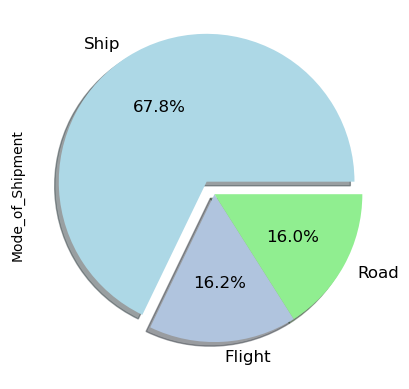

In [14]:
my_colors = ['lightblue','lightsteelblue','lightgreen']
my_explode = (0.1, 0,0)
df['Mode_of_Shipment'].value_counts().plot(kind='pie',fontsize=12,autopct='%1.1f%%', 
                                                         shadow = True,explode=my_explode,colors=my_colors)

# Customer_care_calls

Text(0.5, 1.0, 'Reaching delivery based on Product_importance')

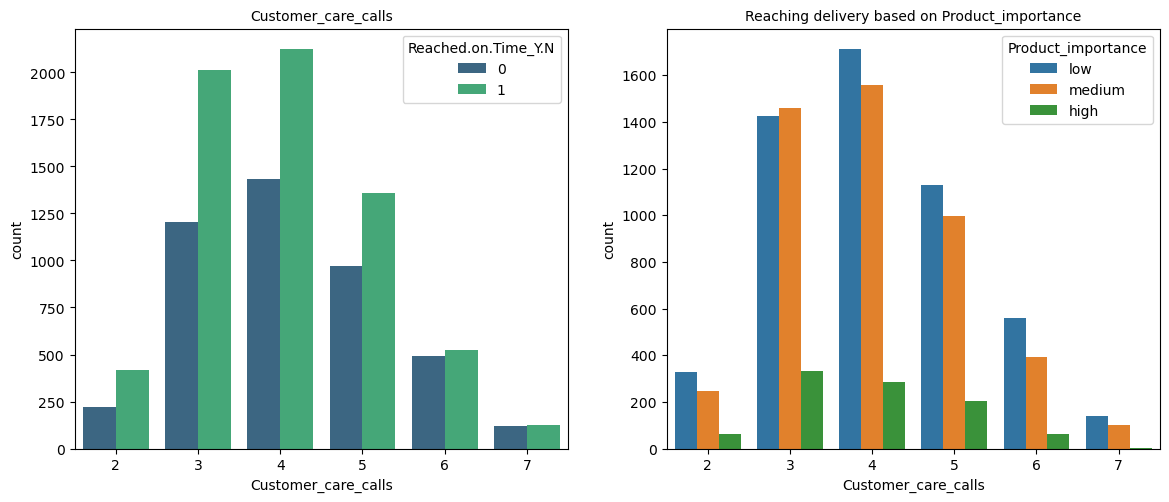

In [15]:
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
sns.countplot(x='Customer_care_calls',hue='Reached.on.Time_Y.N', data=df,palette='viridis')
plt.title('Customer_care_calls', fontsize=10)

plt.subplot(2, 2, 2)
sns.countplot(x='Customer_care_calls',hue='Product_importance', data=df)
plt.title('Reaching delivery based on Product_importance', fontsize=10)

# Customer rating

<Axes: xlabel='Customer_rating', ylabel='count'>

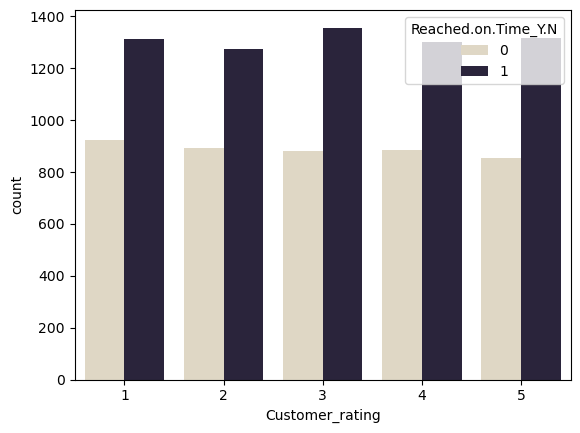

In [16]:
sns.countplot(x='Customer_rating',hue='Reached.on.Time_Y.N', data=df,palette='ch:s=-.2,r=.6')

# Cost_of_the_Product

<Axes: xlabel='Cost_of_the_Product', ylabel='Count'>

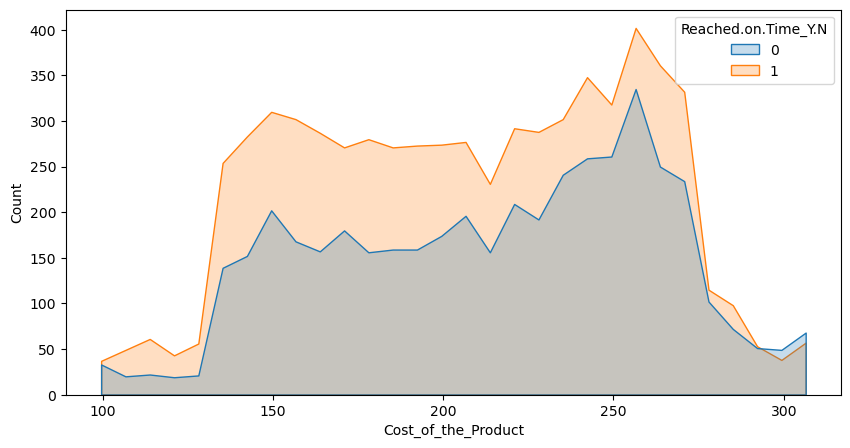

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(df,x="Cost_of_the_Product",hue="Reached.on.Time_Y.N",element="poly",color="g")

# Prior purchases

<Axes: xlabel='Prior_purchases', ylabel='count'>

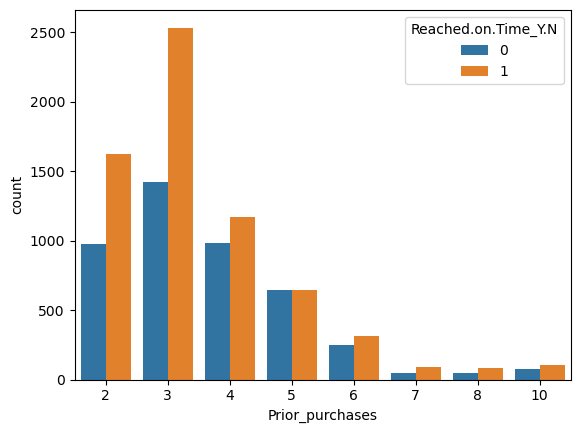

In [19]:
sns.countplot(x='Prior_purchases',hue='Reached.on.Time_Y.N', data=df)

<Axes: xlabel='Product_importance', ylabel='count'>

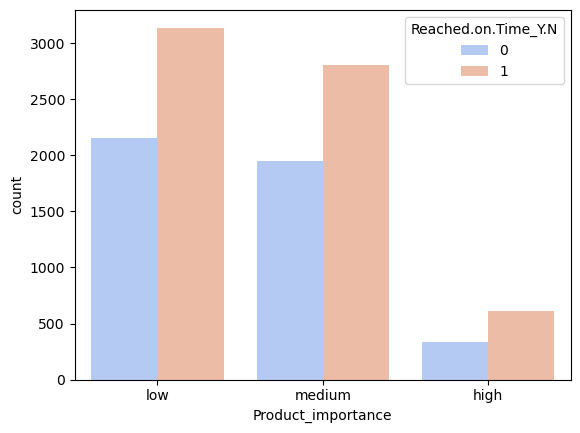

In [20]:
sns.countplot(x='Product_importance',hue='Reached.on.Time_Y.N', data=df,palette='coolwarm')

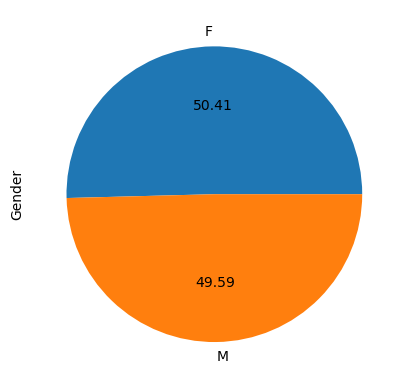

In [21]:
df['Gender'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

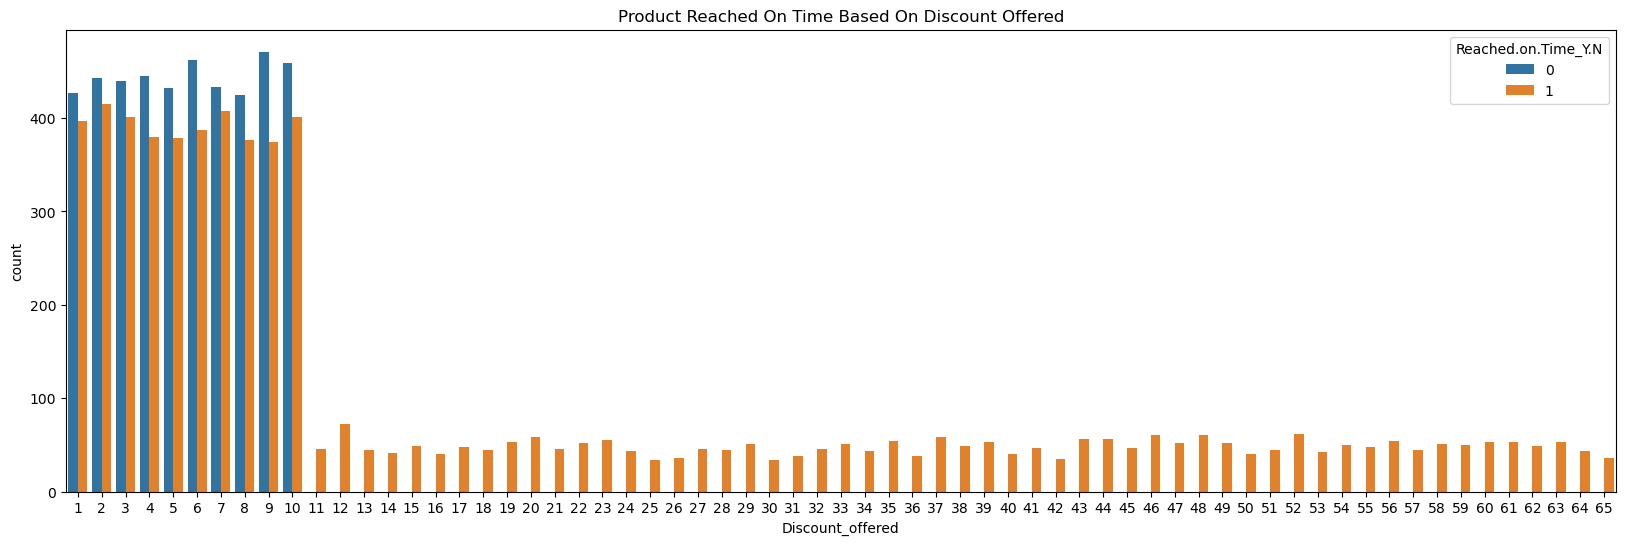

In [22]:
plt.figure(figsize=(20, 6))
sns.countplot(data=df, hue='Reached.on.Time_Y.N', x='Discount_offered')
plt.title('Product Reached On Time Based On Discount Offered')
plt.show()

40% of the total deliveries are not reached on time


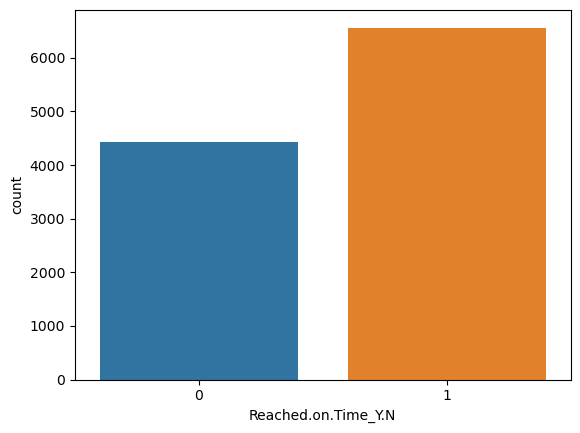

In [23]:
sns.countplot(x='Reached.on.Time_Y.N',data=df)
print("40% of the total deliveries are not reached on time")

# Converting categorical columns into numeric (One Hot coding).


In [24]:
df1 = pd.get_dummies(df)

In [25]:
df1.shape

(10999, 21)

In [26]:
df1['Reached.on.Time_Y.N'].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

# Train Test Split

In [27]:
# Modeling
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix

In [28]:
x = df1.drop(['Reached.on.Time_Y.N'], axis=1)
y = df1['Reached.on.Time_Y.N']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

In [31]:
X_train

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
109,110,4,1,141,3,47,1250,0,0,0,0,1,0,0,1,0,0,1,0,1
180,181,4,1,161,7,18,1294,0,0,0,1,0,0,0,1,0,0,1,1,0
10385,10386,5,5,272,2,4,5342,0,0,0,0,1,0,1,0,0,1,0,1,0
736,737,5,3,200,8,9,2741,0,0,1,0,0,0,0,1,0,1,0,1,0
9539,9540,5,4,275,2,7,5292,0,0,0,0,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,1620,4,1,167,3,10,1616,0,0,0,0,1,0,1,0,0,1,0,1,0
6041,6042,6,4,253,4,7,1485,0,0,0,0,1,1,0,0,0,1,0,1,0
10290,10291,4,1,266,2,4,5116,0,0,0,1,0,1,0,0,1,0,0,0,1
5815,5816,5,3,218,3,4,4198,0,0,0,0,1,0,0,1,0,0,1,1,0


# Logistic Regression

In [32]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.6618181818181819
              precision    recall  f1-score   support

           0       0.57      0.64      0.60       887
           1       0.74      0.68      0.70      1313

    accuracy                           0.66      2200
   macro avg       0.65      0.66      0.65      2200
weighted avg       0.67      0.66      0.66      2200



# Support Vector Classifier (SVC)

In [34]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel='rbf', C=1.0, random_state=42)  
svc_classifier.fit(X_train, y_train)
y_predict = svc_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_predict))

Accuracy: 0.6886363636363636
              precision    recall  f1-score   support

           0       0.57      0.98      0.72       887
           1       0.97      0.49      0.65      1313

    accuracy                           0.69      2200
   macro avg       0.77      0.74      0.69      2200
weighted avg       0.81      0.69      0.68      2200



# Decision Tree Classifier

In [36]:
#A decision tree is a model that uses a sequence of if-else conditions to partition data 
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_predict))

Accuracy: 0.6504545454545455
              precision    recall  f1-score   support

           0       0.57      0.56      0.57       887
           1       0.71      0.71      0.71      1313

    accuracy                           0.65      2200
   macro avg       0.64      0.64      0.64      2200
weighted avg       0.65      0.65      0.65      2200



# Decision Tree Classifier With Gridsearchcv

In [38]:
from sklearn.model_selection import GridSearchCV
decision_tree = DecisionTreeClassifier()
params = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, 10, 15, 20], 'min_samples_split': [2, 5, 10]}

grid_search = GridSearchCV(decision_tree, params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
y_pred = grid_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Best hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}
Accuracy: 0.6890909090909091
              precision    recall  f1-score   support

           0       0.57      0.99      0.72       887
           1       0.99      0.48      0.65      1313

    accuracy                           0.69      2200
   macro avg       0.78      0.74      0.69      2200
weighted avg       0.82      0.69      0.68      2200



# Random Forest Classifier

In [40]:
#combines multiple tree to reach a single result
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()

random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.6631818181818182
              precision    recall  f1-score   support

           0       0.56      0.76      0.64       887
           1       0.79      0.60      0.68      1313

    accuracy                           0.66      2200
   macro avg       0.67      0.68      0.66      2200
weighted avg       0.69      0.66      0.67      2200



# Random Forest Classifier with GridSearchCV

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf_classifier = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [43]:
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [44]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.6881818181818182
              precision    recall  f1-score   support

           0       0.57      0.94      0.71       887
           1       0.93      0.52      0.66      1313

    accuracy                           0.69      2200
   macro avg       0.75      0.73      0.69      2200
weighted avg       0.78      0.69      0.68      2200



# Smote

In [46]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE with the desired sampling strategy
smote = SMOTE(sampling_strategy=1)

# Apply SMOTE to generate synthetic samples
x_resampled, y_resampled = smote.fit_resample(x, y)

In [47]:
y_resampled.value_counts()

1    6563
0    6563
Name: Reached.on.Time_Y.N, dtype: int64

In [48]:
df_encoded2 = pd.concat([x_resampled, y_resampled], axis=1, join='inner')
df_encoded2

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,...,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M,Reached.on.Time_Y.N
0,1,4,2,177,3,44,1233,0,0,0,...,0,1,0,0,0,1,0,1,0,1
1,2,4,5,216,2,59,3088,0,0,0,...,1,1,0,0,0,1,0,0,1,1
2,3,2,2,183,4,48,3374,1,0,0,...,0,1,0,0,0,1,0,0,1,1
3,4,3,3,176,4,10,1177,0,1,0,...,0,1,0,0,0,0,1,0,1,1
4,5,2,2,184,3,46,2484,0,0,1,...,0,1,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13121,3284,3,2,241,2,6,4959,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13122,6714,2,1,209,3,5,4244,0,0,0,...,0,0,0,0,0,0,0,0,1,0
13123,10899,2,2,123,4,8,5885,0,0,0,...,0,0,0,0,0,1,0,0,0,0
13124,8900,6,5,301,4,6,1066,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [49]:
df_encoded2.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,...,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M,Reached.on.Time_Y.N
count,13126.000000,13126.000000,13126.000000,13126.000000,13126.000000,13126.000000,13126.000000,13126.000000,13126.000000,13126.000000,...,13126.000000,13126.000000,13126.000000,13126.000000,13126.000000,13126.000000,13126.000000,13126.000000,13126.000000,13126.000000
mean,5744.009447,4.015923,2.924730,210.988953,3.527731,12.033445,3718.951470,0.144218,0.144370,0.144065,...,0.298492,0.139875,0.140408,0.645284,0.073518,0.443547,0.397455,0.463584,0.454137,0.500000
std,3097.120273,1.130619,1.382107,47.316265,1.490169,15.172648,1640.123669,0.351324,0.351478,0.351169,...,0.457614,0.346871,0.347423,0.478445,0.260995,0.496822,0.489390,0.498691,0.497911,0.500019
min,1.000000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3257.000000,3.000000,2.000000,171.000000,3.000000,4.000000,1865.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5816.500000,4.000000,3.000000,215.000000,3.000000,7.000000,4263.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,8399.750000,5.000000,4.000000,251.000000,4.000000,10.000000,5116.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10999.000000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
x = df_encoded2.drop(['Reached.on.Time_Y.N'], axis=1)
y = df_encoded2['Reached.on.Time_Y.N']

In [51]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

# Logistic Regression 

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_predict))

Accuracy: 0.7124904798172125
              precision    recall  f1-score   support

           0       0.68      0.79      0.73      1313
           1       0.75      0.64      0.69      1313

    accuracy                           0.71      2626
   macro avg       0.72      0.71      0.71      2626
weighted avg       0.72      0.71      0.71      2626



# Support Vector Classifier (SVC)

In [53]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel='rbf', C=1.0, random_state=42)  
svc_classifier.fit(x_train, y_train)
y_predict = svc_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_predict))

Accuracy: 0.7383853769992383
              precision    recall  f1-score   support

           0       0.66      1.00      0.79      1313
           1       1.00      0.48      0.65      1313

    accuracy                           0.74      2626
   macro avg       0.83      0.74      0.72      2626
weighted avg       0.83      0.74      0.72      2626



# Decision Tree Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_predict))

Accuracy: 0.7033511043412034
              precision    recall  f1-score   support

           0       0.71      0.69      0.70      1313
           1       0.70      0.71      0.71      1313

    accuracy                           0.70      2626
   macro avg       0.70      0.70      0.70      2626
weighted avg       0.70      0.70      0.70      2626



# Decision Tree Classifier with GridSearchCV

In [56]:
decision_tree = DecisionTreeClassifier()
params = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, 10, 15, 20], 'min_samples_split': [2, 5, 10]}

grid_search = GridSearchCV(decision_tree, params, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
y_pred = grid_search.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
Accuracy: 0.7364813404417365
              precision    recall  f1-score   support

           0       0.66      0.99      0.79      1313
           1       0.97      0.49      0.65      1313

    accuracy                           0.74      2626
   macro avg       0.82      0.74      0.72      2626
weighted avg       0.82      0.74      0.72      2626



# Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()

random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.725057121096725
              precision    recall  f1-score   support

           0       0.68      0.86      0.76      1313
           1       0.80      0.59      0.68      1313

    accuracy                           0.73      2626
   macro avg       0.74      0.73      0.72      2626
weighted avg       0.74      0.73      0.72      2626



# Random Forest Classifier with GridSearchCV

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf_classifier = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [60]:
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.7334348819497334
              precision    recall  f1-score   support

           0       0.66      0.97      0.78      1313
           1       0.94      0.50      0.65      1313

    accuracy                           0.73      2626
   macro avg       0.80      0.73      0.72      2626
weighted avg       0.80      0.73      0.72      2626



In [ ]:
#df.to_csv('modeldataset_new.csv', index=False)